In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("BIKE DETAILS.csv")

In [ ]:
#1.  What is the range of selling prices in the dataset?


price_range = df['selling_price'].min(), df['selling_price'].max()
print("Range of selling prices:", price_range)


Range of selling prices: (5000, 760000)


In [ ]:
#2. What is the median selling price for bikes in the dataset

median_selling_price = df['selling_price'].median()
median_selling_price

45000.0

In [ ]:
#3. What is the most common seller type?

most_common_seller_type = df['seller_type'].value_counts().idxmax()
most_common_seller_type

'Individual'

In [ ]:
#4. How many bikes have driven more than 50,000 kilometers?

bikes_driven_more_than_50k = (df['km_driven'] > 50000).sum()
bikes_driven_more_than_50k

np.int64(170)

In [ ]:
#5. What is the average km_driven value for each ownership type?

average_km_driven_by_ownership = df.groupby('owner')['km_driven'].mean()
average_km_driven_by_ownership

,km_driven
owner,
1st owner,32816.583333
2nd owner,39288.991870
3rd owner,33292.181818
4th owner,311500.000000


In [ ]:
#6. What proportion of bikes are from the year 2015 or older?
bikes_2015_or_older = df[df['year'] <= 2015].shape[0]


total_bikes = df.shape[0]

proportion = bikes_2015_or_older / total_bikes

print(f"Proportion of bikes from 2015 or older: {proportion:.2%}")

Proportion of bikes from 2015 or older: 56.64%


In [ ]:
#7. What is the trend of missing values across the dataset?

missing_values_trend = df.isnull().sum()
missing_values_trend

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


In [ ]:
#8. What is the highest ex_showroom_price recorded, and for which bike?

highest_ex_showroom_price = df['ex_showroom_price'].max()
bike_with_highest_price = df[df['ex_showroom_price'] == highest_ex_showroom_price]

highest_ex_showroom_price
bike_with_highest_price


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
134,Harley-Davidson Street Bob,750000,2013,Individual,2nd owner,12000,1278000.0


In [ ]:
#9. What is the total number of bikes listed by each seller type?

total_bikes_by_seller_type = df['seller_type'].value_counts()
total_bikes_by_seller_type

,count
seller_type,
Individual,1055
Dealer,6


In [ ]:
#10. What is the relationship between selling_price and km_driven for first-owner bikes?

first_owner_bikes = df[df['owner'] == 'First Owner']
first_owner_bikes.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price


In [ ]:
#11.  Identify and remove outliers in the km_driven column using the IQR method?

Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

print(f"Original rows: {len(df)}")
print(f"Rows after removing outliers: {len(df_no_outliers)}")

Original rows: 1061
Rows after removing outliers: 1022


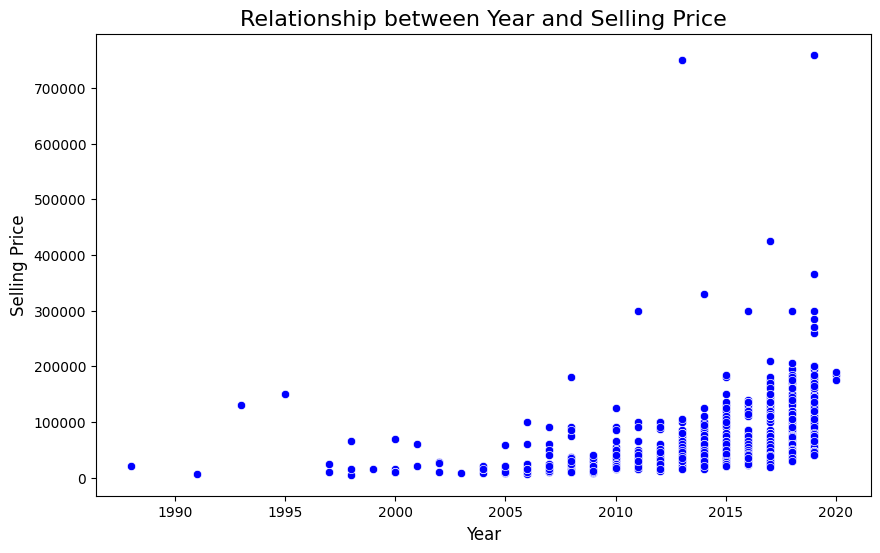

Correlation matrix:
                    year  selling_price
year           1.000000       0.402188
selling_price  0.402188       1.000000


In [ ]:
#12. Perform a bivariate analysis to visualize the relationship between year and selling_price.

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='year', y='selling_price', color='blue')

# Add titles and labels
plt.title('Relationship between Year and Selling Price', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Selling Price', fontsize=12)

# Show plot
plt.show()

# Optionally, you can also calculate the correlation coefficient
correlation = df[['year', 'selling_price']].corr()
print("Correlation matrix:\n", correlation)

In [ ]:
#13. What is the average depreciation in selling price based on the bike's age (current year - manufacturin year)?

current_year = 2023

df['age'] = current_year - df['year']

df['depreciation'] = df['selling_price'] - df['ex_showroom_price']

average_depreciation = df['depreciation'].mean()

print(f"Average Depreciation in Selling Price: {average_depreciation:.2f}")

Average Depreciation in Selling Price: -28513.55


In [ ]:
#14. Which bike names are priced significantly above the average price for their manufacturing year?

avg_price_per_year = df.groupby('year')['selling_price'].mean().reset_index()
avg_price_per_year.rename(columns={'selling_price': 'avg_selling_price'}, inplace=True)
avg_price_per_year.head()

,year,avg_selling_price
0,1988,20000.0
1,1991,6000.0
2,1993,130000.0
3,1995,150000.0
4,1997,17500.0


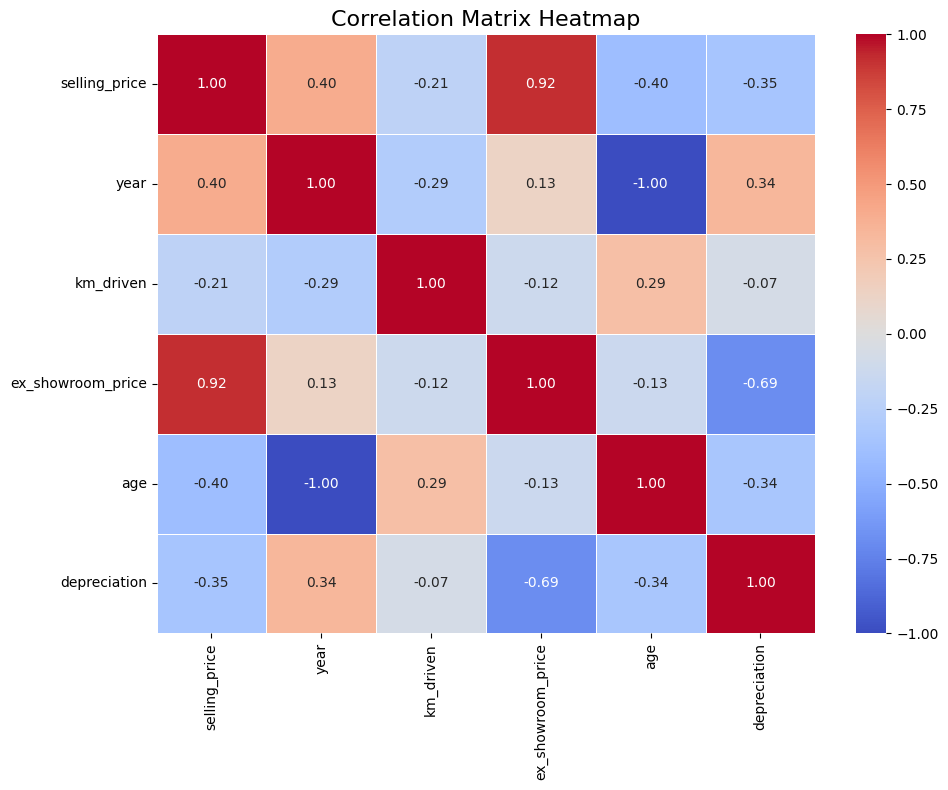

In [ ]:
#15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.

# Select only numeric columns before calculating the correlation
numeric_df = df.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()

# Step 2: Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add titles and adjust the layout
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv ("Car Sale.csv")

In [6]:
#1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?

average_selling_price_by_dealer = df.groupby('dealer')['selling_price'].mean()
average_selling_price_by_dealer

KeyError: 'dealer'

In [8]:
avg_price_per_dealer = df.groupby('Dealer_Name')["Price ($)"].mean().sort_values(ascending=False)
print(avg_price_per_dealer)


Dealer_Name
Rabun Used Car Sales                               29813.633880
Scrivener Performance Engineering                  29252.087349
Star Enterprises Inc                               29130.641176
U-Haul CO                                          29035.694524
Buddy Storbeck's Diesel Service Inc                28998.445055
Pars Auto Sales                                    28842.091954
Clay Johnson Auto Sales                            28840.613636
Chrysler Plymouth                                  28812.215909
Ryder Truck Rental and Leasing                     28798.637931
Motor Vehicle Branch Office                        28694.412429
Iceberg Rentals                                    28650.652941
Tri-State Mack Inc                                 28393.646199
New Castle Ford Lincoln Mercury                    28371.618182
Nebo Chevrolet                                     28353.247126
Diehl Motor CO Inc                                 28250.710983
Gartner Buick Hyundai Saab  

In [9]:
#2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?

price_variation = df.groupby('Company')["Price ($)"].std().sort_values(ascending=False)
print(price_variation.head())


Company
Saab        21440.459860
Lincoln     20660.754558
Plymouth    19680.215509
Cadillac    18790.606561
Nissan      17407.187483
Name: Price ($), dtype: float64


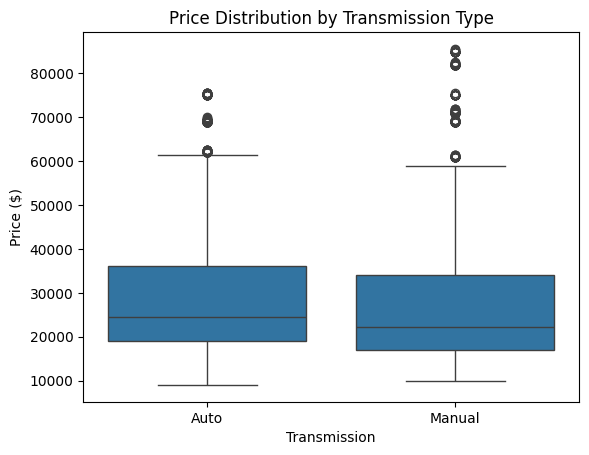

Manual IQR: 0.25    17000.0
0.75    34000.0
Name: Price ($), dtype: float64
Automatic IQR: 0.25   NaN
0.75   NaN
Name: Price ($), dtype: float64


In [10]:
#3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?

sns.boxplot(x='Transmission', y='Price ($)', data=df)
plt.title("Price Distribution by Transmission Type")
plt.show()

iqr_manual = df[df['Transmission'] == 'Manual']["Price ($)"].quantile([0.25, 0.75])
iqr_auto = df[df['Transmission'] == 'Automatic']["Price ($)"].quantile([0.25, 0.75])
print("Manual IQR:", iqr_manual)
print("Automatic IQR:", iqr_auto)


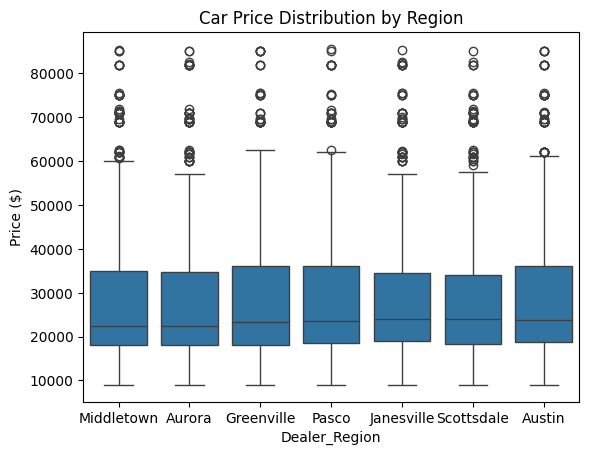

In [11]:
#4. What is the distribution of car prices across different regions?

sns.boxplot(x='Dealer_Region', y='Price ($)', data=df)
plt.title("Car Price Distribution by Region")
plt.show()


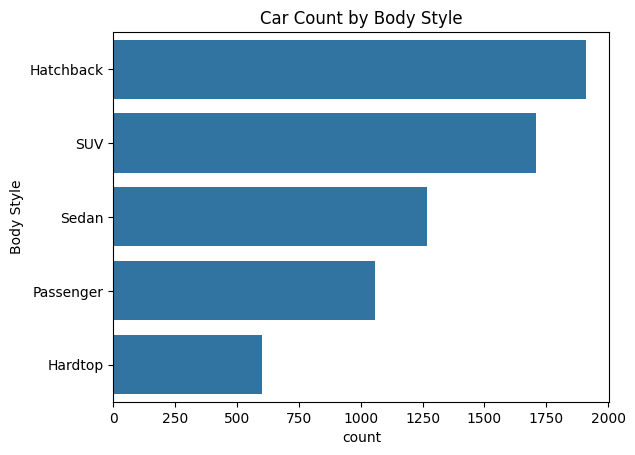

In [12]:
#5. What is the distribution of cars based on body styles?

sns.countplot(y='Body Style', data=df, order=df['Body Style'].value_counts().index)
plt.title("Car Count by Body Style")
plt.show()


In [13]:
#6. How does the average selling price of cars vary by customer gender and annual income?

avg_price_gender_income = df.groupby(['Gender'])[['Price ($)', 'Annual Income']].mean()
print(avg_price_gender_income)


           Price ($)  Annual Income
Gender                             
Female  28355.359727  817988.600683
Male    28338.940783  872125.567270


In [14]:
#7. What is the distribution of car prices by region, and how does the number of cars sold vary by region?

region_data = df.groupby('Dealer_Region')["Price ($)"].agg(['mean', 'count'])
print(region_data)


                       mean  count
Dealer_Region                     
Aurora         28239.501190    840
Austin         28398.290237   1137
Greenville     28517.461085    848
Janesville     28197.446226   1060
Middletown     28380.314385    862
Pasco          28497.461538    845
Scottsdale     28202.003138    956


In [15]:
#8. How does the average car price differ between cars with different engine sizes?

avg_price_by_engine = df.groupby('Engine')["Price ($)"].mean().sort_values(ascending=False)
print(avg_price_by_engine)


Engine
DoubleÂ Overhead Camshaft    28543.788534
Overhead Camshaft            28115.680208
Name: Price ($), dtype: float64


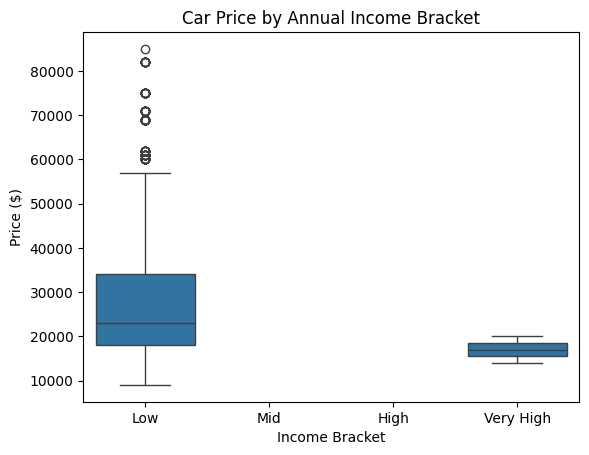

In [16]:
#9. How do car prices vary based on the customer’s annual income bracket?

df['Income Bracket'] = pd.cut(df['Annual Income'], bins=[0, 30000, 60000, 100000, 200000], labels=['Low', 'Mid', 'High', 'Very High'])

sns.boxplot(x='Income Bracket', y='Price ($)', data=df)
plt.title("Car Price by Annual Income Bracket")
plt.show()


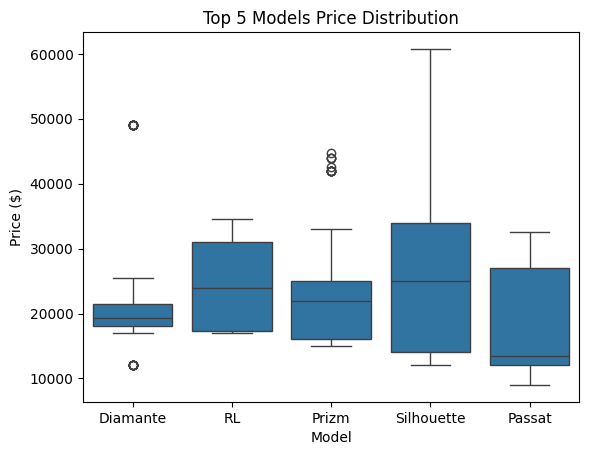

In [17]:
#10.  What are the top 5 car models with the highest number of sales, and how does their price distribution look?

top_models = df['Model'].value_counts().head(5).index
top_model_prices = df[df['Model'].isin(top_models)]

sns.boxplot(x='Model', y='Price ($)', data=top_model_prices)
plt.title("Top 5 Models Price Distribution")
plt.show()


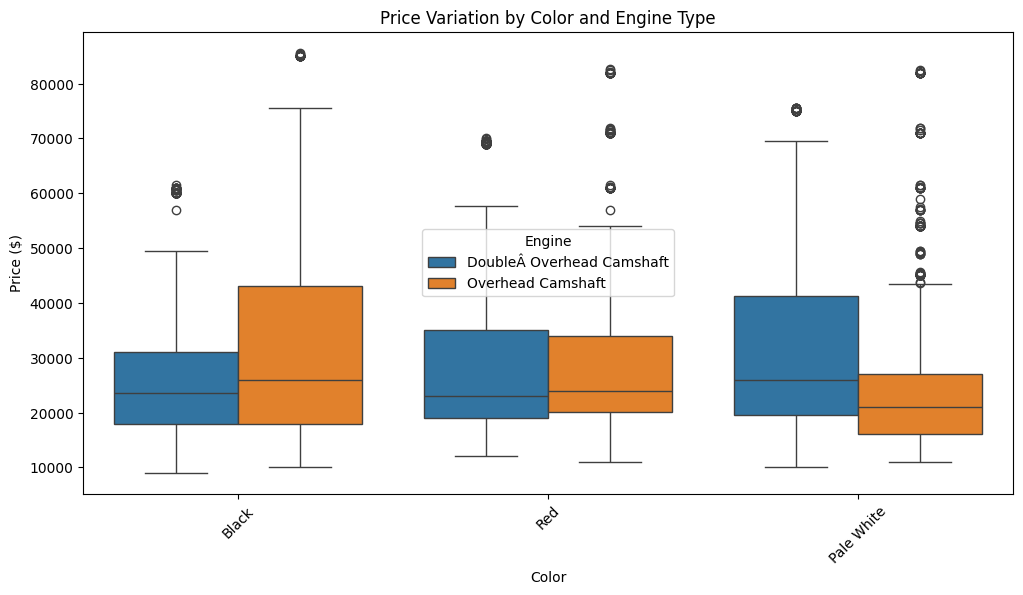

Color
Red           16532.132537
Black         14762.208971
Pale White    14010.835207
Name: Price ($), dtype: float64


In [18]:
#11. How does car price vary with engine size across different car colors, and which colors have the highest price variation?

plt.figure(figsize=(12, 6))
sns.boxplot(x='Color', y='Price ($)', hue='Engine', data=df)
plt.title("Price Variation by Color and Engine Type")
plt.xticks(rotation=45)
plt.show()

# Price variance by color
color_variation = df.groupby('Color')["Price ($)"].std().sort_values(ascending=False)
print(color_variation.head())


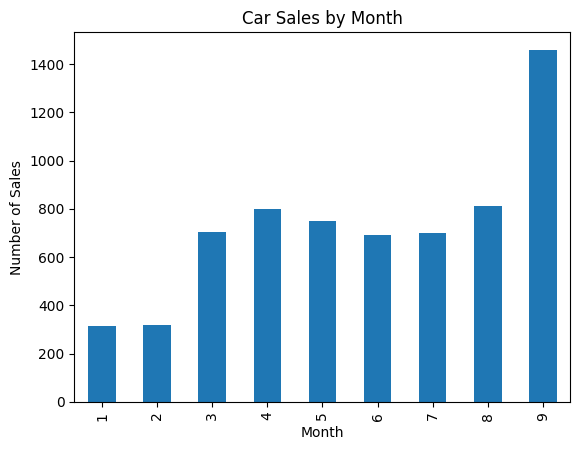

In [19]:
#12. Is there any seasonal trend in car sales based on the date of sale?

df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

monthly_sales = df.groupby('Month')["Car_id"].count()
monthly_sales.plot(kind='bar')
plt.title("Car Sales by Month")
plt.xlabel("Month")
plt.ylabel("Number of Sales")
plt.show()


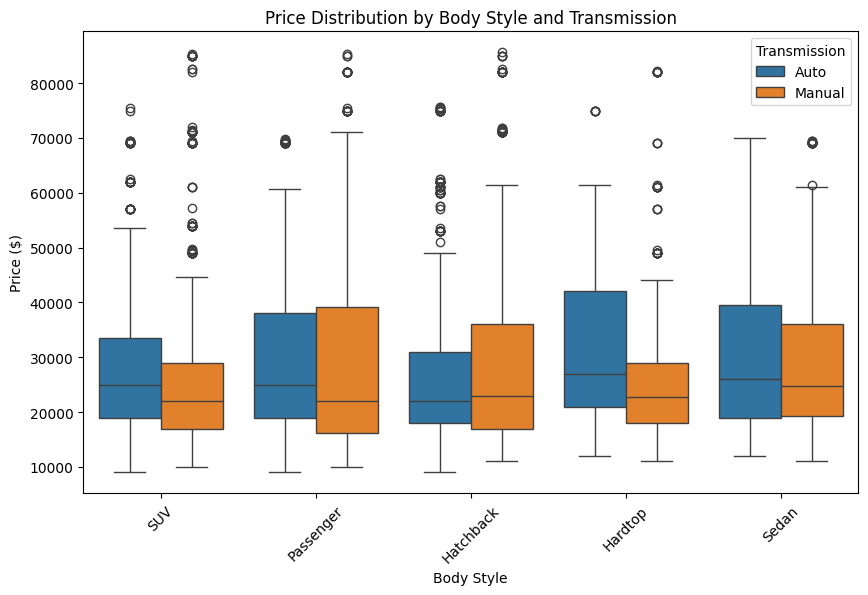

In [20]:
#13. How does the car price distribution change when considering different combinations of body style and transmission type?

plt.figure(figsize=(10,6))
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=df)
plt.title("Price Distribution by Body Style and Transmission")
plt.xticks(rotation=45)
plt.show()


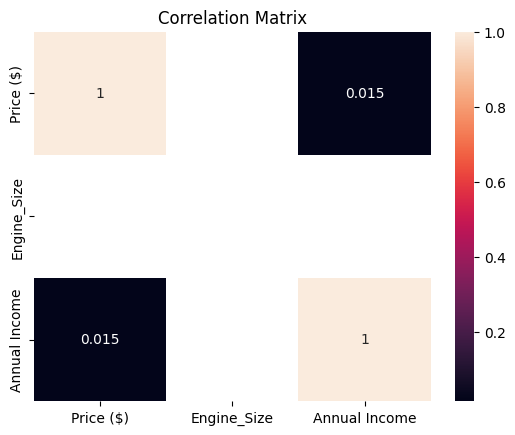

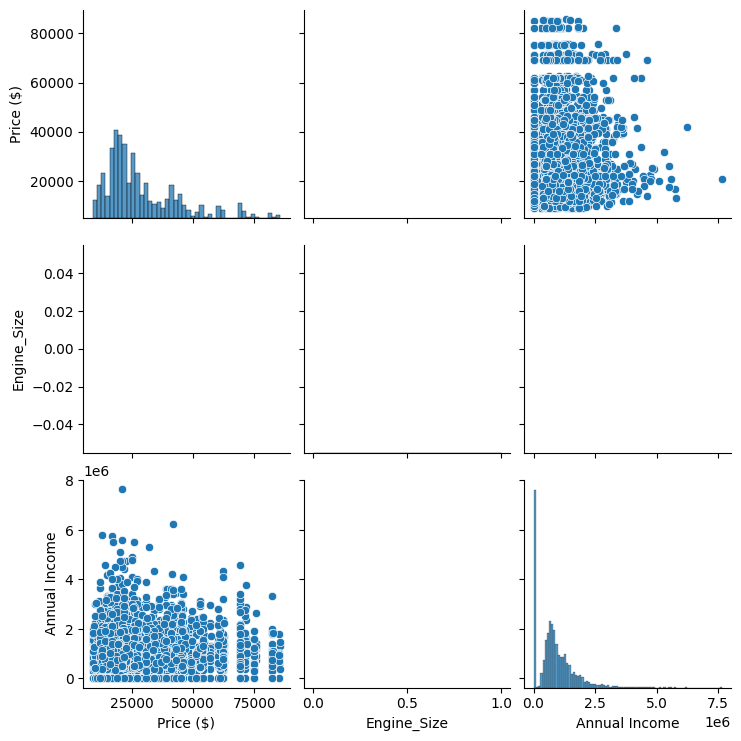

In [21]:
#14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?

# Convert Engine to categorical size if needed
df['Engine_Size'] = df['Engine'].str.extract('(\d+)').astype(float)

sns.heatmap(df[['Price ($)', 'Engine_Size', 'Annual Income']].corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()

sns.pairplot(df[['Price ($)', 'Engine_Size', 'Annual Income']])
plt.show()


In [24]:
#15. How does the average car price vary across different car models and engine types?

avg_price_model_engine = df.groupby(['Model', 'Engine'])["Price ($)"].mean().sort_values(ascending=False)
print(avg_price_model_engine.head(10))

Model    Engine                   
Ranger   DoubleÂ Overhead Camshaft    61100.000000
SC       Overhead Camshaft            61073.823529
Sable    Overhead Camshaft            61038.538462
Aurora   Overhead Camshaft            57156.250000
Catera   DoubleÂ Overhead Camshaft    54702.217391
DeVille  DoubleÂ Overhead Camshaft    54294.789474
LX470    Overhead Camshaft            54058.882353
GS400    Overhead Camshaft            53333.333333
Tacoma   DoubleÂ Overhead Camshaft    53068.454545
Prowler  Overhead Camshaft            52141.448276
Name: Price ($), dtype: float64


In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [26]:
df = pd.read_csv("amazon.csv")

In [29]:
#1. What is the average rating for each product category?

# Convert the 'rating' column to numeric, handling errors
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

avg_rating_per_category = df.groupby('category')['rating'].mean().sort_values(ascending=False)
print(avg_rating_per_category)

category
Computers&Accessories|Tablets                                                                                    4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters                                         4.5
Electronics|Cameras&Photography|Accessories|Film                                                                 4.5
Computers&Accessories|Components|Memory                                                                          4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                                                     4.5
                                                                                                                ... 
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                               3.6
Electronics|HomeTheater,TV&Video|Accessories|3DGlasses                                                           3.5
Computers&Accessories|Accessories&Peripherals|Audio&Vid

In [30]:
#2. What are the top rating_count products by category?

top_rated_products = df.sort_values(by='rating_count', ascending=False).groupby('category').head(1)
print(top_rated_products[['category', 'product_name', 'rating_count']])


                                               category  \
1279  Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...   
750   Electronics|GeneralPurposeBatteries&BatteryCha...   
977   Electronics|Headphones,Earbuds&Accessories|Hea...   
1059  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...   
151   Computers&Accessories|Accessories&Peripherals|...   
...                                                 ...   
895   Home&Kitchen|CraftMaterials|DrawingMaterials|D...   
941   Computers&Accessories|Printers,Inks&Accessorie...   
526   Electronics|Mobiles&Accessories|MobileAccessor...   
1157  Car&Motorbike|CarAccessories|InteriorAccessori...   
1399  Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea...   

                                           product_name rating_count  
1279  Eureka Forbes car Vac 100 Watts Powerful Sucti...          992  
750        Eveready Red 1012 AAA Batteries - Pack of 10          989  
977   Sennheiser CX 80S in-Ear Wired Headphones with...       98,250  
1059  P

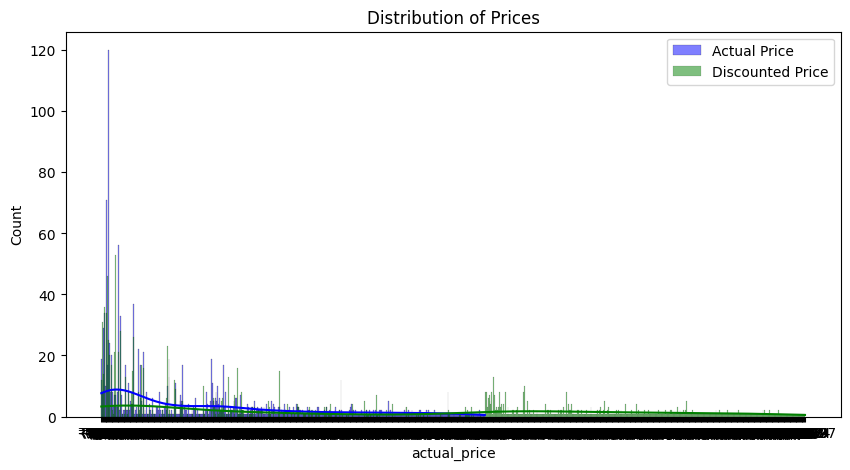

In [31]:
#3. What is the distribution of discounted prices vs. actual prices?

plt.figure(figsize=(10, 5))
sns.histplot(df['actual_price'], color='blue', label='Actual Price', kde=True)
sns.histplot(df['discounted_price'], color='green', label='Discounted Price', kde=True)
plt.legend()
plt.title("Distribution of Prices")
plt.show()


In [33]:
#4. How does the average discount percentage vary across categories?

# Convert 'discount_percentage' to numeric by removing '%' and converting to float
df['discount_percentage'] = df['discount_percentage'].str.rstrip('%').astype(float)

avg_discount_by_category = df.groupby('category')['discount_percentage'].mean().sort_values(ascending=False)
print(avg_discount_by_category)

category
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|CableConnectionProtectors                            90.0
Electronics|Headphones,Earbuds&Accessories|Earpads                                                                    90.0
Electronics|Mobiles&Accessories|MobileAccessories|Décor|PhoneCharms                                                   90.0
Electronics|Headphones,Earbuds&Accessories|Adapters                                                                   88.0
Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MiceAccessories|DustCovers         87.5
                                                                                                                      ... 
OfficeProducts|OfficeElectronics|Calculators|Financial&Business                                                        0.0
OfficeProducts|OfficePaperProducts|Paper|Copy&PrintingPaper|ColouredPaper                                              0.0
OfficeP

In [34]:
#5. What are the most popular product names?

top_products = df['product_name'].value_counts().head(10)
print(top_products)


product_name
Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution                                                  5
Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating                                                           4
Amazonbasics Nylon Braided Usb-C To Lightning Cable, Fast Charging Mfi Certified Smartphone, Iphone Charger (6-Foot, Dark Grey)                                                                            3
Duracell USB Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black                                                 3
Flix Micro Usb Cable For Smartphone (Black)                                                                                                                            

In [35]:
#6. What are the most popular product keywords?

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', max_features=50)
X = vectorizer.fit_transform(df['about_product'].dropna())
keywords = pd.Series(np.array(X.sum(axis=0)).flatten(), index=vectorizer.get_feature_names_out())
top_keywords = keywords.sort_values(ascending=False).head(10)
print(top_keywords)


usb         1230
cable        919
warranty     733
charging     662
type         633
easy         613
high         603
power        595
use          576
devices      574
dtype: int64


In [36]:
#7. What are the most popular product reviews?

popular_reviews = df['review_content'].value_counts().head(10)
print(popular_reviews)


review_content
I am not big on camera usage, personally. I was even mentally prepared for a bad camera, based on some reviews here. But I was pleasantly surprised that camera clicks good photos. They are not awesome, but they are decent photos that can even be shared.Now coming to my biggest grouse; heating issue. The phone started heating up while charging, but it was just a little and so I could have ignored it. But then it started heating up more and got me very concerned. I even ordered a replacement thinking I got a defective piece. But then, after further tests, I found that it is heating more when I download huge amounts of data, for example, when I restore data of my old phone, from back up. This is ok with me as, I don't perform huge data loads regularly, definitely not on phone. Then I tested by running tasks I usually perform such as checking office mails, attending office meeting on phone, watching a video from Amazon Prime, and so on. The phone did not heat up even a littl

                  discounted_price    rating
discounted_price          1.000000  0.120337
rating                    0.120337  1.000000


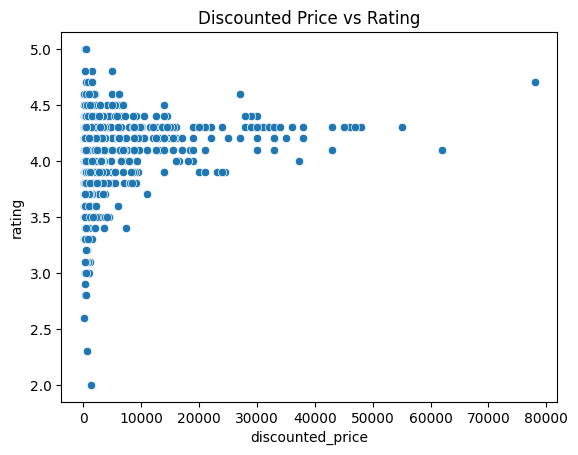

In [38]:
#8. What is the correlation between discounted_price and rating?

# Convert 'discounted_price' to numeric, removing currency symbols and commas
df['discounted_price'] = pd.to_numeric(df['discounted_price'].str.replace('₹', '').str.replace(',', ''), errors='coerce')

# Now calculate the correlation
correlation = df[['discounted_price', 'rating']].corr()
print(correlation)

# Visualize
sns.scatterplot(x='discounted_price', y='rating', data=df)
plt.title("Discounted Price vs Rating")
plt.show()

In [39]:
#9.  What are the Top 5 categories based on the highest rating?

top_categories_by_rating = df.groupby('category')['rating'].mean().sort_values(ascending=False).head(5)
print(top_categories_by_rating)


category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Computers&Accessories|Components|Memory                                     4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
Name: rating, dtype: float64


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For interactive plots if desired
# %matplotlib inline

# Load your dataset
df = pd.read_csv('spotify.csv')  # Update with your file path



In [45]:
#1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful.

print("Null values:\n", df.isnull().sum())

df.dropna(inplace=True)

# Duplicates
print("Duplicate rows:", df.duplicated().sum())

# Remove duplicates
df.drop_duplicates(inplace=True)


Null values:
 Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64
Duplicate rows: 27


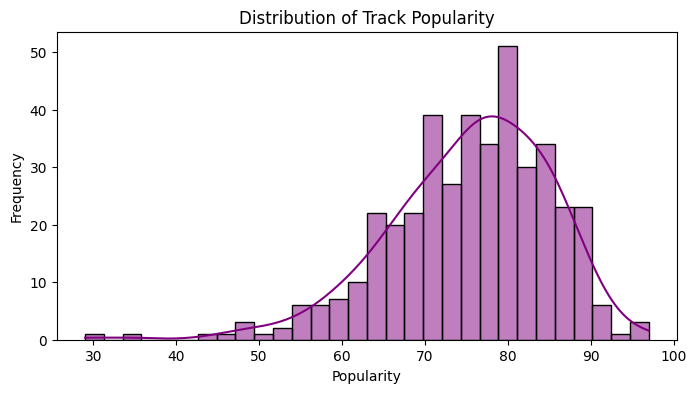

In [46]:
#2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.

plt.figure(figsize=(8, 4))
sns.histplot(df['Popularity'], bins=30, kde=True, color='purple')
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()


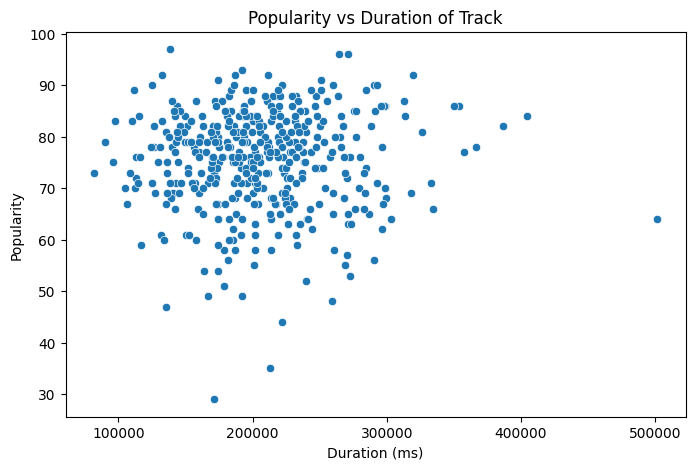

In [47]:
#3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.

plt.figure(figsize=(8, 5))
sns.scatterplot(x='Duration (ms)', y='Popularity', data=df)
plt.title('Popularity vs Duration of Track')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.show()


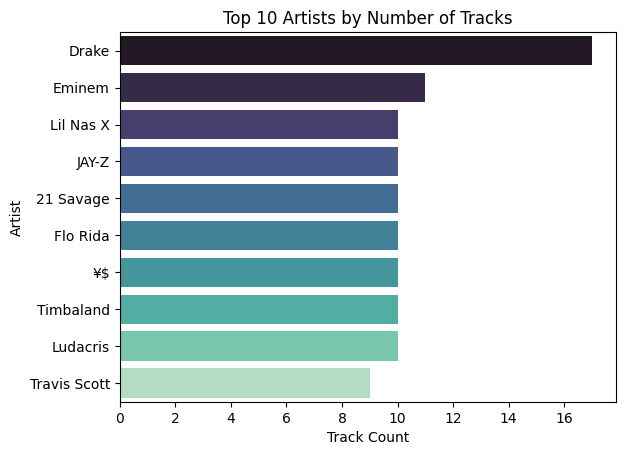

In [48]:
#4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot.

top_artists = df['Artist'].value_counts().head(10)

sns.barplot(y=top_artists.index, x=top_artists.values, palette='mako')
plt.title('Top 10 Artists by Number of Tracks')
plt.xlabel('Track Count')
plt.ylabel('Artist')
plt.show()


In [49]:
#5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

least_popular = df.nsmallest(5, 'Popularity')
print(least_popular[['Artist', 'Track Name', 'Popularity']])


             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


In [50]:
#6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist.

top_5_artists = df['Artist'].value_counts().head(5).index
top_artist_avg = df[df['Artist'].isin(top_5_artists)].groupby('Artist')['Popularity'].mean().sort_values(ascending=False)
print(top_artist_avg)


Artist
21 Savage    83.800000
Eminem       83.636364
Drake        82.882353
JAY-Z        77.900000
Lil Nas X    75.900000
Name: Popularity, dtype: float64


In [51]:
#7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.

for artist in top_5_artists:
    track = df[df['Artist'] == artist].sort_values(by='Popularity', ascending=False).head(1)
    print(f"{artist} → {track.iloc[0]['Track Name']} (Popularity: {track.iloc[0]['Popularity']})")


Drake → Rich Baby Daddy (feat. Sexyy Red & SZA) (Popularity: 92)
Eminem → Without Me (Popularity: 90)
Lil Nas X → THATS WHAT I WANT (Popularity: 81)
JAY-Z → Ni**as In Paris (Popularity: 86)
21 Savage → redrum (Popularity: 96)


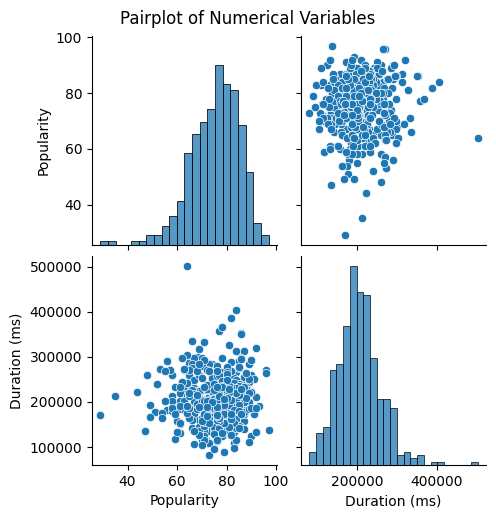

In [52]:
#8. Visualize relationships between multiple numerical variables simultaneously using a pair plot.

sns.pairplot(df[['Popularity', 'Duration (ms)']])
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()


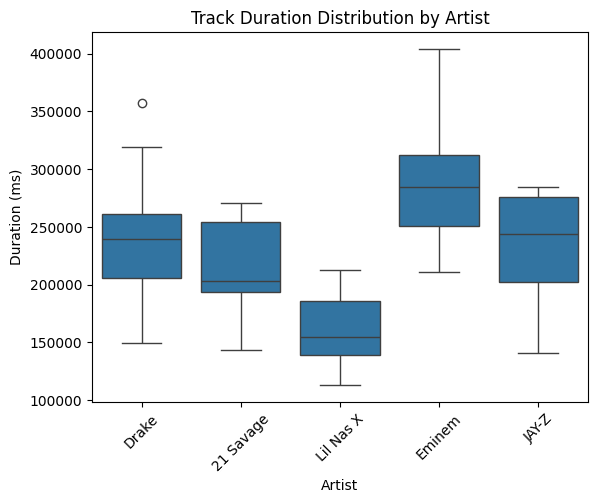

In [53]:
#9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.

top_artists = df['Artist'].value_counts().head(5).index
sns.boxplot(data=df[df['Artist'].isin(top_artists)], x='Artist', y='Duration (ms)')
plt.title('Track Duration Distribution by Artist')
plt.xticks(rotation=45)
plt.show()


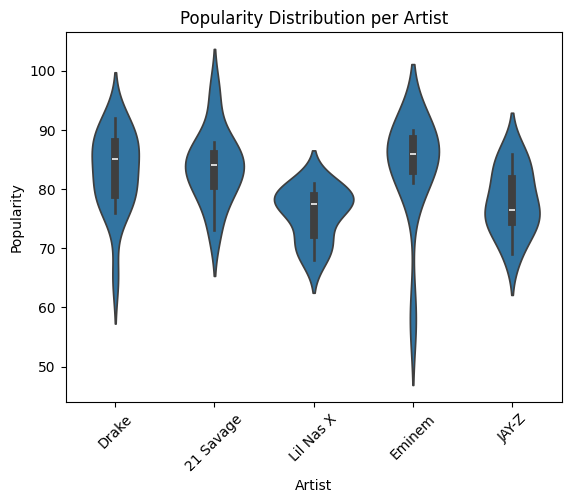

In [54]:
#10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

sns.violinplot(data=df[df['Artist'].isin(top_artists)], x='Artist', y='Popularity', inner='box')
plt.title('Popularity Distribution per Artist')
plt.xticks(rotation=45)
plt.show()
